In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [11]:
df = pd.read_csv('main.csv')

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df = df.drop(columns=['PassengerId','Name','Sex','Pclass','Ticket','Cabin','Embarked'])

In [15]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [16]:
df['family'] = df['SibSp'] + df['Parch']

In [18]:
df = df.drop(columns=['Parch','SibSp'])
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   family    891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [21]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
family       0.00000
dtype: float64

In [22]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [25]:
X_train.isnull().mean()

Age       0.207865
Fare      0.000000
family    0.000000
dtype: float64

In [26]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [27]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [28]:
X_train.sample(5)

,Age,Fare,family,Age_median,Age_mean,Fare_median,Fare_mean
11,58.0,26.5500,0,58.00,58.000000,26.5500,26.5500
568,NaN,7.2292,0,28.75,29.785904,7.2292,7.2292
6,54.0,51.8625,0,54.00,54.000000,51.8625,51.8625
399,28.0,12.6500,0,28.00,28.000000,12.6500,12.6500
287,22.0,7.8958,0,22.00,22.000000,7.8958,7.8958


In [29]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2368.2468324201386
Fare Variance after median imputation:  2368.2468324201386
Fare Variance after mean imputation:  2368.2468324201386


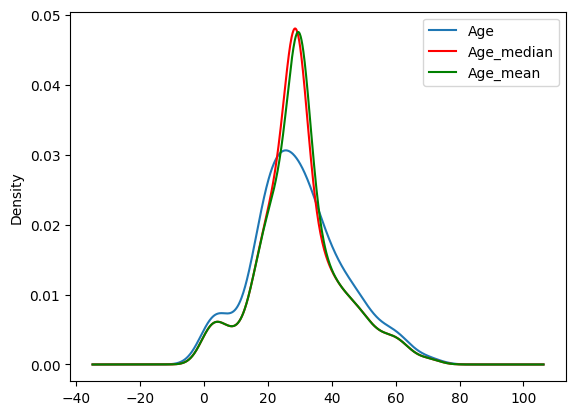

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

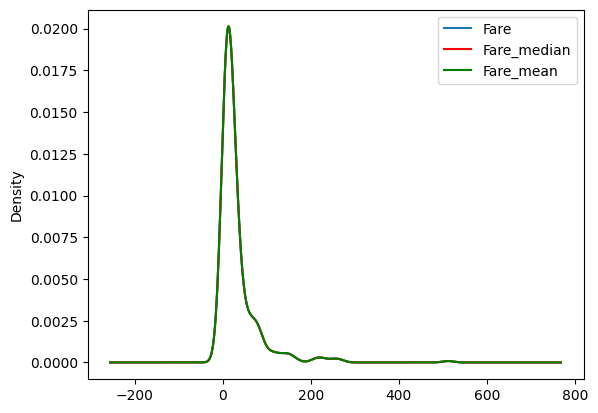

In [31]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [32]:
X_train.cov()

,Age,Fare,family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,71.512440,-6.498901,204.349513,204.349513,71.512440,71.512440
Fare,71.512440,2368.246832,16.847264,58.986531,56.626587,2368.246832,2368.246832
family,-6.498901,16.847264,2.735252,-5.112563,-5.146106,16.847264,16.847264
Age_median,204.349513,58.986531,-5.112563,161.989566,161.812625,58.986531,58.986531
Age_mean,204.349513,56.626587,-5.146106,161.812625,161.812625,56.626587,56.626587
Fare_median,71.512440,2368.246832,16.847264,58.986531,56.626587,2368.246832,2368.246832
Fare_mean,71.512440,2368.246832,16.847264,58.986531,56.626587,2368.246832,2368.246832


In [33]:
X_train.corr()

,Age,Fare,family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.095814,-0.299113,1.000000,1.000000,0.095814,0.095814
Fare,0.095814,1.000000,0.209323,0.095235,0.091475,1.000000,1.000000
family,-0.299113,0.209323,1.000000,-0.242883,-0.244610,0.209323,0.209323
Age_median,1.000000,0.095235,-0.242883,1.000000,0.999454,0.095235,0.095235
Age_mean,1.000000,0.091475,-0.244610,0.999454,1.000000,0.091475,0.091475
Fare_median,0.095814,1.000000,0.209323,0.095235,0.091475,1.000000,1.000000
Fare_mean,0.095814,1.000000,0.209323,0.095235,0.091475,1.000000,1.000000


<Axes: >

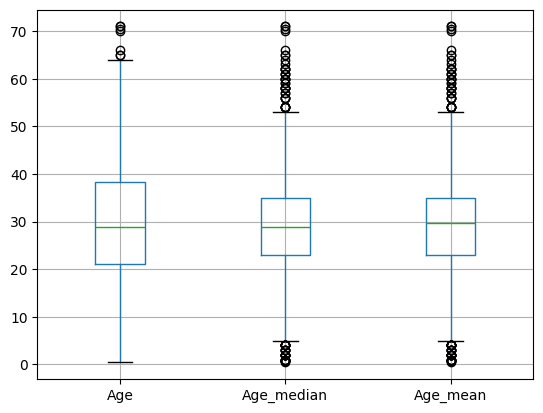

In [34]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

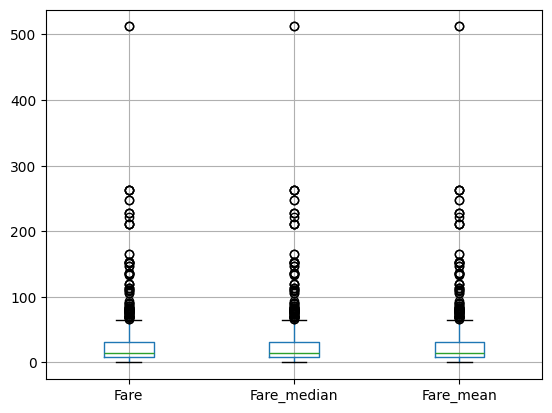

In [35]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [38]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [39]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [40]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [41]:
trf.named_transformers_['imputer2'].statistics_

array([32.28905604])

In [42]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [43]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))